# Table of Contents
1. [Imports](#1-imports)
2. [Wages Data](#2-wages-data)
    * [Data Manipulation and Analysis](#data-manipulation-and-analysis-wages)
    * [Data Visualization and Statistics](#data-visualization-and-statistics-wages)
    * [Discussion of Wages Analysis](#discussion-of-wages-analysis)
3. [Employment Data](#3-employment-data)
    * [Data Manipulation and Analysis](#data-manipulation-and-analysis-employment) 
    * [Data Visualization and Statistics](#data-visualization-and-statistics-employment)
    * [Discussion of Employment Analysis](#discussion-of-employment-analysis)
    * [Extra Visualizations](#extra-visualizations-of-employment-data)
4. [Census Data - Commute](#4-census-data)
    * [Data Manipulation and Analysis](#data-manipulation-and-analysis-census)
    * [Data Visualization and Statistics for Commuting](#data-visualization-and-statistics-commute)
    * [Data Visualization and Statistics for Relative Housing Cost](#data-visualization-and-statistics-housing)
    * [Discussion of Relative Housing Cost Analysis](#discussion-of-relative-housing-cost-analysis)
5. [Data Extensibility](#5-data-extensibility)


# 1. Imports

In [1]:
# Imports dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from textwrap import wrap
import seaborn as sns

In [2]:
# Paths to the datasets required for analysis
wages = "../census_summary_and_employment/Outputs/wage_data.csv"
employment = "../census_summary_and_employment/Outputs/employment_numbers.csv"
census = "../census_summary_and_employment/Outputs/census_data.csv"

# 2. Wages Data

## Data Manipulation and Analysis (Wages)

In [3]:
# Reads the wages data into a DataFrame
wages_df = pd.read_csv(wages, dtype={'NOC Major Group': object, 'NOC Minor Group': object, 'National Occupational Classification (NOC)': object, 
                               'Economic region code': np.int64, 'Economic region name': object, 'Minimum wage': np.float64, 
                               'Median wage': np.float64, 'Maximum wage': np.float64})

# Selects major group 22, since Major Group is the smallest split in both datasets and 22=Technical occupations related to natural and applied sciences
wages_filtered = wages_df.loc[wages_df['NOC Major Group'] == '22'].reset_index(drop=True)

# Shows the dataframe
wages_filtered.head()


,NOC Major Group,NOC Minor Group,NOC Title,Economic region code,Economic region name,Minimum wage,Median wage,Maximum wage
0,22,2211,Chemical technologists and technicians,3510,Ottawa,NaN,NaN,NaN
1,22,2211,Chemical technologists and technicians,3515,Kingston--Pembroke,18.0,28.00,45.19
2,22,2211,Chemical technologists and technicians,3520,Muskoka--Kawarthas,18.0,28.00,45.19
3,22,2211,Chemical technologists and technicians,3530,Toronto,17.0,25.96,38.46
4,22,2211,Chemical technologists and technicians,3540,Kitchener--Waterloo--Barrie,16.0,29.00,45.19


In [4]:
# Groups the data by economic region, since that's the smallest grouping that's in both datasets
wages_grouped = wages_filtered.groupby(['Economic region code'])

## Gets stats for min, max, and average media wage for each economic region for graphing
# Finds min of mins
Minimum_Wage = wages_grouped["Minimum wage"].min()
# Finds mean of medians
Average_Median_Wage = wages_grouped["Median wage"].mean()
# Finds max of maxes
Maximum_Wage = wages_grouped["Maximum wage"].max()
# Finds stdev of average median wage
Stdev_med_wage = wages_grouped["Median wage"].std()
# Finds stdev of average median wage
Stdev_min_wage = wages_grouped["Minimum wage"].std()
# Finds stdev of average median wage
Stdev_max_wage = wages_grouped["Maximum wage"].std()
# Finds averages of max and min wages 
Average_min_max = wages_grouped[["Minimum wage", "Maximum wage"]].mean()

## Sets up a new dataframe to show stats for each economic region
# Takes Economic region code and name, and removes duplicates
summary_df = wages_filtered[['Economic region code', 'Economic region name']].drop_duplicates(keep='first')
# Adds summary columns
summary_df = summary_df.merge(Minimum_Wage, on='Economic region code')
summary_df = summary_df.merge(Average_Median_Wage, on='Economic region code')
summary_df = summary_df.merge(Maximum_Wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_min_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_med_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_max_wage, on='Economic region code')
summary_df = summary_df.merge(Average_min_max, on='Economic region code')

# Renames columns
summary_df = summary_df.rename(columns={'Minimum wage_x': 'Minimum Wage', 'Median wage_x': "Average Median Wage", 'Maximum wage_x': "Maximum Wage", "Minimum wage_y":"Minimum Wage StDev", "Maximum wage_y":"Maximum Wage StDev" ,"Median wage_y":"Median Wage StDev", "Minimum wage": 'Average Minimum Wage', "Maximum wage": "Average Maximum Wage"})

# Shows the dataframe
summary_df

,Economic region code,Economic region name,Minimum Wage,Average Median Wage,Maximum Wage,Minimum Wage StDev,Median Wage StDev,Maximum Wage StDev,Average Minimum Wage,Average Maximum Wage
0,3510,Ottawa,15.0,32.063333,65.93,3.757295,5.536724,9.302812,20.986667,45.314762
1,3515,Kingston--Pembroke,15.0,30.676667,58.48,2.727379,4.887484,7.473141,19.964667,42.824000
2,3520,Muskoka--Kawarthas,16.0,28.925000,52.00,2.641913,4.833502,7.134455,19.142000,41.535000
3,3530,Toronto,16.0,32.157143,96.15,3.529929,5.390597,13.717059,20.387500,49.028571
4,3540,Kitchener--Waterloo--Barrie,15.8,31.069500,96.15,3.955876,5.373450,13.025610,20.795000,48.021500
5,3550,Hamilton--Niagara Peninsula,15.0,32.496364,96.15,4.556641,5.432012,12.958103,21.723182,48.061364
6,3560,London,15.0,30.772105,58.48,3.355934,5.269138,7.783255,20.612105,44.480000
7,3570,Windsor--Sarnia,15.0,29.220667,55.00,2.667580,5.366881,8.517807,20.173333,43.568667
8,3580,Stratford--Bruce Peninsula,16.0,30.389091,72.27,2.634526,6.417754,11.071963,19.124545,46.638182
9,3590,Northeast,15.0,31.754375,68.00,3.495179,6.285308,10.599986,21.483125,47.205000


## Data Visualization and Statistics (Wages)
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

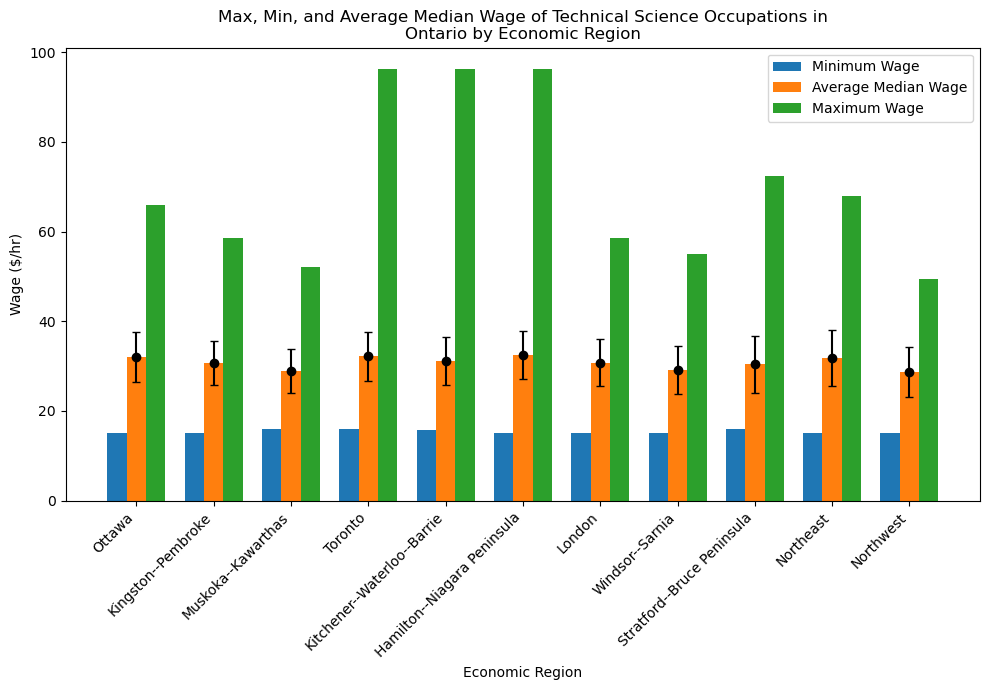

The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.796743349868663, pvalue=0.6319804761577644)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.9635777558398096, pvalue=0.4769788544874015)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.8793911833429731, pvalue=0.5536477054835411)


In [5]:
### Plots the Min, Max, and Average of the Median Wage by economic region

# Sets up labels
labels = summary_df['Economic region name']
# Sets up label locations on x-axis
x_axis = np.arange(len(labels))
# Sets up bar width
width = 0.25

# Sets up the chart
plt.figure(figsize=(10, 7))
plt.bar(x_axis - width, summary_df['Minimum Wage'], width, label='Minimum Wage')
plt.bar(x_axis, summary_df['Average Median Wage'], width, label='Average Median Wage')
plt.bar(x_axis + width, summary_df['Maximum Wage'], width, label='Maximum Wage')

# Formats the chart
plt.errorbar(x=x_axis, y=summary_df['Average Median Wage'], yerr=summary_df["Median Wage StDev"], fmt="o", capsize=3, color='black')
plt.ylabel("Wage ($/hr)")
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Max, Min, and Average Median Wage of Technical Science Occupations in Ontario by Economic Region")))
plt.xticks(x_axis, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("Outputs/wages_NOC22.png")

# Shows the plot
plt.show()

### Performs ANOVA test on the data to look for significant differences in the means of the max, min, and median wages in each economic region
## Makes groups for ANOVA analysis
# Sets up empty dicts to hold groups
min_wage_groups = {}
max_wage_groups = {}
med_wage_groups = {}

# Iterates through Economic regions and populates groups
for region in summary_df['Economic region code']:
    min_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Minimum wage']>0)]['Minimum wage']
    max_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Maximum wage']>0)]['Maximum wage']
    med_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Median wage']>0)]['Median wage']

## Performs ANOVA analysis to determine the significance of any differences in the means of the median, minimum, and maximum hourly wages in the different economic regions
min_sig = stats.f_oneway(*(min_wage_groups[region] for region in summary_df['Economic region code']))
max_sig = stats.f_oneway(*(max_wage_groups[region] for region in summary_df['Economic region code']))
med_sig = stats.f_oneway(*(med_wage_groups[region] for region in summary_df['Economic region code']))

# Prints the analysis
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {min_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {max_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {med_sig}")

**Description of the above graph**
* This graph is a visualization of wage data for jobs in the NOC major group 22 (technical occupations related to "natural and applied sciences") for each economic region in Ontario
* The dataset is available as maximum, minimum, and median hourly wage by NOC minor group and economic region
    * Many minor groups make up one major group, so summary statistics are for all minor groups that make up this major group
    * Economic region is the only geographic breakdown available for this data
* This graph plots the average of the median hourly wage for all the minor group occupations that make up major group 22
    * This bar has error bars that represent the standard deviation of the dataset
* This graph also plots the absolute minimum and maximum wage for the entire set of jobs by economic region
    * These bars do not have error bars, as they represent single data points

## Discussion of Wages Analysis

### Limitations
* Stats Canada has only summary data for wage numbers available (maximum, minimum, and median for each job in each economic region)
    * This means that the error is not fully correct, nor are the ANOVAs, but is the best that could be done with what was accessible
    * ANOVAs are based on the averages of each provided set of values for the set of NOC minor level jobs belonging to each NOC major level classification
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * While NOC minor group level is represented in the wage dataset, it is not represented in the employment numbers dataset
        * NOC major level was used so as to better compare wages with job opportunities
* This dataset is from 2021
    * During COVID, many tech/ IT jobs moved to primarily work from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This dataset documents wages of individuals living in each economic region
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

### Analysis
* There is no significant difference between the average median, maximum, or minimum wage of individual tech jobs related to natural and applied sciences in different economic regions in Ontario
    * p-values are 0.63 between the average of the minimum wages, 0.48 between the average of the maximum wages, and 0.55 between the average of the median wages 
* The absolute maximum wage possible for this jobset in Ontario is the highest in three economic regions
    * The max wage in Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula is $96 per hour, while the next highest wage is $72 per hour in Stratford-Bruce Peninsula
    * This could indicate that the Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula economic regions have the best job progression prospects
        * The max wages are likely earned by more senior employees, and the max wage is the highest in these three areas while the median and minimum wages are similar to those in all other economic regions, so wages appear to increase more in these areas than in the remaining economic regions
* The absolute minimum wage possible for this jobset in Ontario is very similar among all economic regions

* **The minimum and median wage for technical occupations related to natural and applied sciences is the same for all economic regions, so the best place to work at low seniority is one where the cost of living is low. Once seniority and experience is gained, the highest wages are available in the Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula economic regions in Ontario.**

# 3. Employment Data

## Data Manipulation and Analysis (Employment)

In [6]:
# Reads the employment data into a DataFrame
employment_df = pd.read_csv(employment, dtype={'REF_DATE': object, 'NOC Major Group': object, 'National Occupational Classification (NOC)': object, 'Economic region code': np.int64,
                                               'Economic region name': object, 'Number Employed (thousands)': np.float64})

# Filters data to keep NOC major group 22 - Technical occupations related to natural and applied sciences
employment_filtered = employment_df[employment_df["NOC Major Group"] == '22']

# Collects only the data for 2021, to match the census data, and resets the index
employment_filtered = employment_filtered[employment_filtered['REF_DATE'] == '2021'].reset_index(drop=True)

# Reads the census data into a DataFrame
census_df = pd.read_csv(census)

# Changes the Economic region code into an int
census_df["Economic region code"].astype(np.int64)

# Takes the total population from the census dataframe, and keeps the economic region to merge on
population = census_df[['Economic region code','Total income recipients']]

# Groups by Economic region code, sums the total population in each region, and divides by 1000 so scale is the same as employment numbers
population = population.groupby("Economic region code").sum().div(1000)

# Merges population into employment numbers on economic region code
employment_filtered = employment_filtered.merge(population, how='outer', on='Economic region code')

# Renames the Total population column
employment_filtered = employment_filtered.rename(columns={"Total income recipients":"Total income recipients (thousands)"})

# Adds a column for percentage of total workers employed in NOC 22
employment_filtered['Percent employed in NOC major group'] = (employment_filtered["Number Employed (thousands)"]/employment_filtered["Total income recipients (thousands)"])*100

# Shows the dataframe
employment_filtered

,REF_DATE,NOC Major Group,National Occupational Classification (NOC),Economic region code,Economic region name,Number Employed (thousands),Total income recipients (thousands),Percent employed in NOC major group
0,2021,22,Technical occupations related to natural and a...,3510,Ottawa,22.2,1113.270,1.994125
1,2021,22,Technical occupations related to natural and a...,3515,Kingston-Pembroke,8.2,389.735,2.103994
2,2021,22,Technical occupations related to natural and a...,3520,Muskoka-Kawarthas,2.5,331.720,0.753648
3,2021,22,Technical occupations related to natural and a...,3530,Toronto,98.9,5179.015,1.909630
4,2021,22,Technical occupations related to natural and a...,3540,Kitchener-Waterloo-Barrie,23.8,1122.615,2.120050
5,2021,22,Technical occupations related to natural and a...,3550,Hamilton-Niagara Peninsula,21.2,1192.315,1.778054
6,2021,22,Technical occupations related to natural and a...,3560,London,10.0,561.810,1.779961
7,2021,22,Technical occupations related to natural and a...,3570,Windsor-Sarnia,8.2,518.280,1.582156
8,2021,22,Technical occupations related to natural and a...,3580,Stratford-Bruce Peninsula,4.9,253.185,1.935344
9,2021,22,Technical occupations related to natural and a...,3590,Northeast,9.4,447.135,2.102273


## Data Visualization and Statistics (Employment) 
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

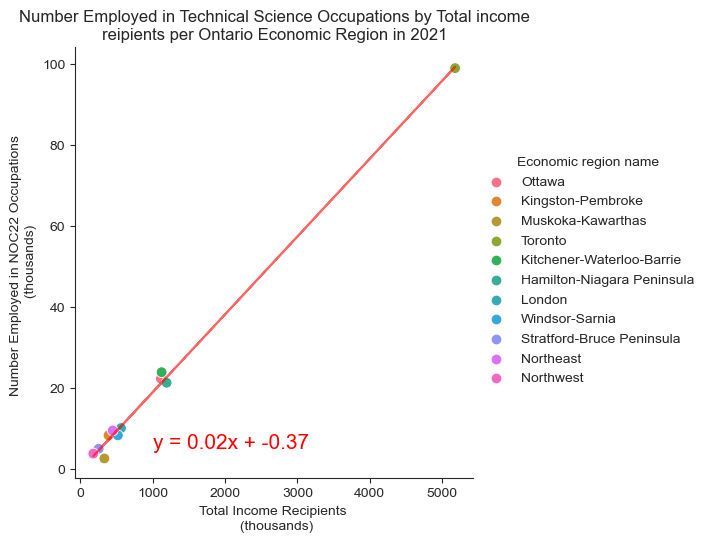

The R-value is 0.9981729930685272 for Number of NOC 22 employees vs Total employees per economic region in 2021


In [7]:
## Plots the number of employees by total employed per economic region

# Sets up theme for seaborn
sns.set_style("ticks")

# Plots the data
sns.relplot(
    data=employment_filtered,
    x="Total income recipients (thousands)", y="Number Employed (thousands)", s=60, hue="Economic region name"
    ).set(title='\n'.join(wrap("Number Employed in Technical Science Occupations by Total income reipients per Ontario Economic Region in 2021")))

# Formats the plot
plt.ylabel("Number Employed in NOC22 Occupations \n (thousands)")
plt.xlabel('Total Income Recipients \n (thousands)')

# Performs a linear regression on the data
slope, intercept, r_val, p_val, std_err = stats.linregress(employment_filtered['Total income recipients (thousands)'], employment_filtered['Number Employed (thousands)'])

# Sets up regression values and line equation
regress_values = employment_filtered['Total income recipients (thousands)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots the regression line and annotates it
plt.plot(employment_filtered['Total income recipients (thousands)'],regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(1000, 5),fontsize=15,color="red")

# Save the figure
plt.savefig("Outputs/num_employed_NOC22_vs_total.png")

# Shows the plot
plt.show()

# Prints the R-value
print(f"The R-value is {r_val} for Number of NOC 22 employees vs Total employees per economic region in 2021")

**Description of the above graph**
* This graph is a visualization of the number employed in NOC major group 22 (technical occupations related to "natural and applied sciences") jobs compared to the total individuals employed in each economic region in Ontario
    * The correlation between these two factors was also calculated, with the regression equation displayed on the graph and the R-value displayed underneath
* The NOC22 employment data is available as one number per economic region per NOC major group, in thousands of employees
    * No number breakdown is available, so no error or summary calculations are possible except for Ontario as a whole, which is out of scope for this project
* The total employed comes from the 2021 ceusus and is available as a single value per census subdivision
    * This was summed by economic region to obtain the total employed per economic region, and then divided by 1,000 to obtain that number in thousands (the same units as the NOC22 employment data)

## Discussion of Employment Analysis

### Limitations
* Stats Canada has a single value per year for each economic region and occupation
    * This means that error cannot be calculated
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * NOC major group is the only level represented in this dataset
* This dataset is from 2021
    * During COVID, many tech/ IT jobs moved to primarily work from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

### Proxies
* Number employed in occupations compared to the total population of a region is a proxy for the job availability / opportunities in that region
    * Assumes that the number of employees required is stable in a given location, and that there is turnover in employees
    * Job openings get filled, so the number employed stays consistent and opportunities open periodically
    * Comparing this number to the total population provides context regarding the number of openings for the specified positions required per capita in each location

### Analysis
* The number employed in the specified ocupations (NOC 22) per economic region correlates very strongly with the total number employed per economic region
    * R-value is 0.998, indicating a very strong correlation
    * This indicates that job opportunities in this sector per capita are very similar in each economic region
* The total employed population in Toronto is, however, much larger than in other economic regions and so is the number employed in technical scientific occupations

* **Overall, while there appears to be very little difference in job opportunities with regards to percentage of total population, there is a much higher number of opportunities in the most populated economic region - Toronto (which has >98 thousand employed in these occupations), which ostensibly comes with a much higher amount of competition for employment**
    * The next most populated economic regions, Ottawa, Kitchener, and Hamilton, have the next most opportunities, with 21-23 thousand employees in these occupations


## Extra Visualizations of Employment Data

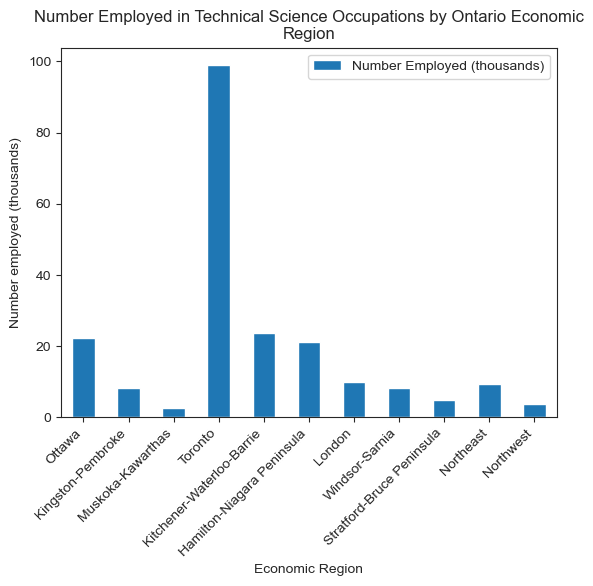

In [8]:
# Plots the number of NOC22 employees by economic region
employment_filtered.plot(kind='bar', x='Economic region name', y='Number Employed (thousands)')

# Formats the graph
plt.xticks(rotation=45, ha='right')
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Number Employed in Technical Science Occupations by Ontario Economic Region")))
plt.ylabel("Number employed (thousands)")

# Save the figure
plt.savefig("Outputs/EXTRA_num_employed_NOC22_alone.png")

# Shows the plot
plt.show()

**Description of the above graph**
* This graph is a visualization of the number employed in NOC major group 22 (technical occupations related to natural and applied sciences) jobs by Economic region in Ontario
* The NOC22 employment data is available as one number per economic region per NOC major group, in thousands of employees
    * No number breakdown is available, so no error or summary calculations are possible except for Ontario as a whole, which is out of scope for this project

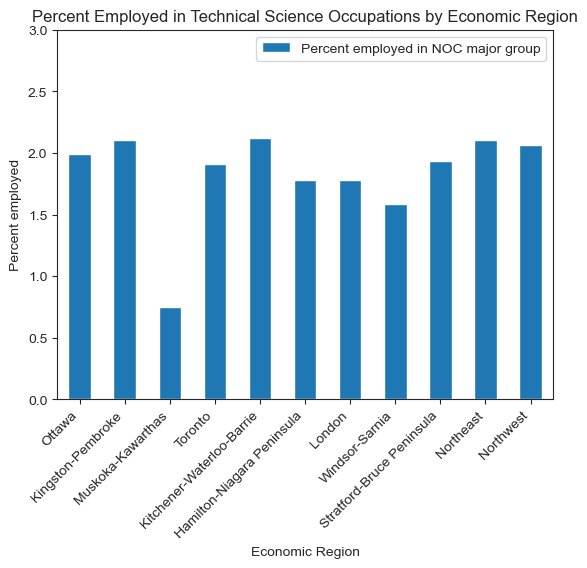

In [9]:
# Plots the percent of NOC22 employees by economic region
employment_filtered.plot(kind='bar', x='Economic region name', y='Percent employed in NOC major group')

# Formats the graph
plt.xticks(rotation=45, ha='right')
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Percent Employed in Technical Science Occupations by Economic Region")))
plt.ylabel("Percent employed")
plt.ylim(0,3)

# Save the figure
plt.savefig("Outputs/EXTRA_percent_employed_NOC22.png")

# Shows the plot
plt.show()

**Description of the above graph**
* This graph is a visualization of the percent employed in NOC major group 22 (technical occupations related to natural and applied sciences) jobs by Economic region in Ontario
* The NOC22 employment data is available as one number per economic region per NOC major group, in thousands of employees
    * No number breakdown is available, so no error or summary calculations are possible except for Ontario as a whole, which is out of scope for this project
* The percent was calculated by dividing the number employed in NOC22 jobs per economic region by the total number employed in that economic region
    * Total employed was obtained from census data, and is made up of a summation of the total number employed by census subdivision in each economic region

# 4. Census Data

## Data Manipulation and Analysis (Census)

In [10]:
# Grabs the census dataframe loaded in earlier
census_df

# Takes location information for a summary dataframe and copies to a new dataframe
summary_census = census_df[['Economic region code', 'Economic region name', 'Census division code',
       'Census division name', 'Census subdivision code','Census subdivision name','Population density (people/square km)']].copy()

# Calculates summary column for percentage of people living >1 person per room
summary_census['Percent of households with >1 person per room'] = (census_df['>1 per room']/census_df['Total households by #/room'])*100

# Calculates summary column for percent of people living in unsuitable housing
summary_census['Percent living in unsuitable housing'] = (census_df['Unsuitable housing']/census_df['Total households by housing suitability'])*100

# Calculates summary column for percent of people spending >30% of income on shelter
summary_census['Percent spending >30% of income on shelter'] = ((census_df['>=30 percent of income spent on shelter']+census_df['30 - <100 percent of income spent on shelter'])/census_df['Total owned and rented households >0 income'])*100

# Calculates columns for percentages of people with different commute times
summary_census['Percent commute <15 min'] = (census_df['Commute <15 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 15-29 min'] = (census_df['Commute 15-29 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 30-44 min'] = (census_df['Commute 30-44 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 45-59 min'] = (census_df['Commute 45-59 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute >=60'] = (census_df['Commute >=60 min']/census_df['Total commuting duration'])*100

# Shows the dataframe
summary_census.head()

,Economic region code,Economic region name,Census division code,Census division name,Census subdivision code,Census subdivision name,Population density (people/square km),Percent of households with >1 person per room,Percent living in unsuitable housing,Percent spending >30% of income on shelter,Percent commute <15 min,Percent commute 15-29 min,Percent commute 30-44 min,Percent commute 45-59 min,Percent commute >=60
0,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501005,"South Glengarry, Township (TP)",22.0,0.644567,2.486188,24.515504,30.030334,41.051567,16.683519,5.055612,7.280081
1,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501007,"Akwesasne (Part) 59, Indian reserve (IRI)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501011,"South Stormont, Township (TP)",30.3,0.369344,1.477378,20.302172,24.591652,48.275862,14.065336,4.990926,7.894737
3,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501012,"Cornwall, City (CY)",777.9,1.355774,4.488079,42.974431,59.745223,26.401274,5.796178,2.197452,5.891720
4,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501020,"South Dundas, Municipality (MU)",21.2,1.075269,3.118280,26.837416,30.038511,24.903723,19.512195,11.938383,13.607189


In [11]:
# Groups by Economic region, finds the averages, and removes other location codes/ names, and outputs a dataframe with average data
ER_summary_mean = summary_census.groupby('Economic region name')[['Population density (people/square km)','Percent of households with >1 person per room','Percent living in unsuitable housing','Percent spending >30% of income on shelter', 'Percent commute <15 min',
       'Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].mean()

# Groups by Economic region, finds the averages, and removes other location codes/ names, and outputs a dataframe with std deviation data
ER_summary_stdev = summary_census.groupby('Economic region name')[['Population density (people/square km)','Percent of households with >1 person per room','Percent living in unsuitable housing','Percent spending >30% of income on shelter', 'Percent commute <15 min',
       'Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].std()

# Merges mean and stdev dataframes
ER_mean_stdev = ER_summary_mean.merge(ER_summary_stdev, on='Economic region name')

# Renames columns
ER_mean_stdev = ER_mean_stdev.rename(columns={'Population density (people/square km)_x': "Population density mean",
       'Percent of households with >1 person per room_x': 'Percent of households with >1 person per room mean',
       'Percent living in unsuitable housing_x':"Percent living in unsuitable housing mean",
       'Percent spending >30% of income on shelter_x': "Percent spending >30% of income on shelter mean",
       'Percent commute <15 min_x': 'Percent commute <15 min mean', 'Percent commute 15-29 min_x': "Percent commute 15-29 min mean",
       'Percent commute 30-44 min_x': "Percent commute 30-44 min mean", 'Percent commute 45-59 min_x': "Percent commute 45-59 min mean",
       'Percent commute >=60_x': "Percent commute >=60 mean", 'Population density (people/square km)_y': "Population density stdev",
       'Percent of households with >1 person per room_y': "Percent of households with >1 person per room stdev",
       'Percent living in unsuitable housing_y': "Percent living in unsuitable housing stdev",
       'Percent spending >30% of income on shelter_y': "Percent spending >30% of income on shelter stdev",
       'Percent commute <15 min_y': "Percent commute <15 min stdev", 'Percent commute 15-29 min_y': "Percent commute 15-29 min stdev",
       'Percent commute 30-44 min_y': "Percent commute 30-44 min stdev", 'Percent commute 45-59 min_y':"Percent commute 45-59 min stdev",
       'Percent commute >=60_y': "Percent commute >=60 stdev"})

# Shows the dataframe
ER_mean_stdev

,Population density mean,Percent of households with >1 person per room mean,Percent living in unsuitable housing mean,Percent spending >30% of income on shelter mean,Percent commute <15 min mean,Percent commute 15-29 min mean,Percent commute 30-44 min mean,Percent commute 45-59 min mean,Percent commute >=60 mean,Population density stdev,Percent of households with >1 person per room stdev,Percent living in unsuitable housing stdev,Percent spending >30% of income on shelter stdev,Percent commute <15 min stdev,Percent commute 15-29 min stdev,Percent commute 30-44 min stdev,Percent commute 45-59 min stdev,Percent commute >=60 stdev
Economic region name,,,,,,,,,,,,,,,,,,
Hamilton-Niagara Peninsula,345.650000,0.874971,3.870739,36.527163,34.915445,32.889377,19.109278,6.677013,6.762356,404.072914,0.589664,2.943186,7.099636,13.529637,9.318974,5.244012,3.028714,2.680839
Kingston-Pembroke,95.313043,0.526554,2.547573,29.543033,32.571432,28.986274,19.393539,7.937101,10.706842,221.159786,0.507005,1.688629,8.477693,12.214524,9.964627,8.197044,5.191795,7.018287
Kitchener-Waterloo-Barrie,383.079545,1.129644,3.813015,36.900824,32.242987,28.635416,16.724226,9.642185,12.897688,606.280514,0.849671,2.034061,8.872280,14.589841,9.068009,5.093204,4.667779,7.110018
London,265.373077,0.775298,3.579999,27.034728,33.005635,31.519042,22.356984,7.925482,5.473840,434.070162,0.853349,3.661062,7.532858,8.769618,8.223714,7.473841,4.165642,2.401423
Muskoka-Kawarthas,100.474194,1.052840,3.193797,32.319553,33.560876,29.149190,18.638218,8.086555,11.155059,274.332539,2.389629,3.346877,6.143657,14.483324,9.058627,5.861387,4.453059,4.339334
Northeast,39.513665,1.026162,3.828640,24.914480,44.826397,24.450304,14.704664,6.346319,8.836921,102.116526,3.115748,5.760025,11.376876,23.490446,15.252232,13.957362,7.330547,8.178237
Northwest,45.718584,8.748004,14.499420,16.722499,66.624034,14.147335,8.274368,2.804496,5.734239,119.048627,11.909590,15.072343,9.402098,23.663775,13.252025,11.493299,5.674537,7.749601
Ottawa,246.186842,0.693304,2.314827,30.433618,31.715934,29.255919,20.003445,10.213630,8.724625,380.014293,0.412035,1.029053,8.851393,12.601098,8.993944,8.397447,4.869518,3.770480
Stratford-Bruce Peninsula,139.882857,0.953913,3.086928,30.939216,41.797924,28.926516,15.229761,6.307642,7.571091,307.903604,0.991964,2.442775,6.341014,11.900561,7.956146,5.178652,2.094595,4.116127


## Data Visualization and Statistics (Commute)
* Number of people with various commute times

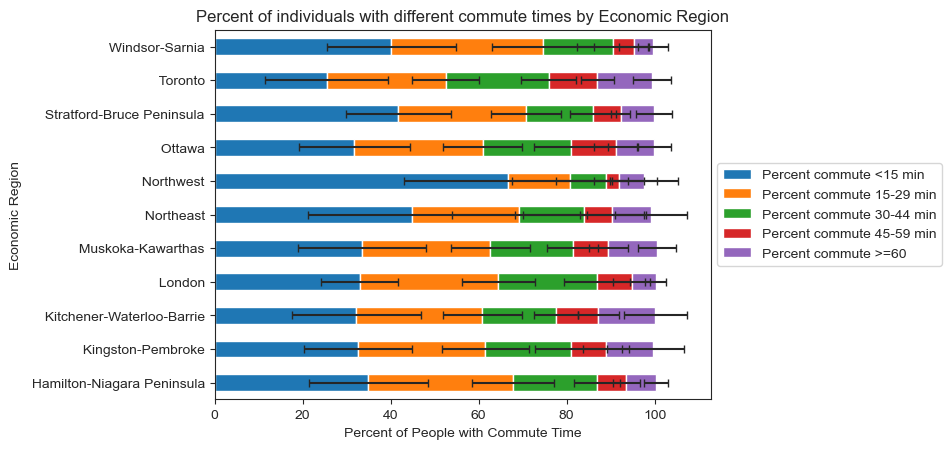

The ANOVA results for percent commuting under 15 min by economic region in Ontario are F_onewayResult(statistic=25.617188304992514, pvalue=1.2171509857073377e-39)
The ANOVA results for percent commuting 15-29 min by economic region in Ontario are F_onewayResult(statistic=6.815917930450651, pvalue=5.563385644172503e-10)
The ANOVA results for percent commuting 30-44 min by economic region in Ontario are F_onewayResult(statistic=3.2348308854116814, pvalue=0.00048041478925174206)
The ANOVA results for percent commuting 45-59 min by economic region in Ontario are F_onewayResult(statistic=3.5192352508684466, pvalue=0.0001798051000479783)
The ANOVA results for percent commuting over 60 min by economic region in Ontario are F_onewayResult(statistic=6.640584292057429, pvalue=1.2641699621353752e-09)


In [12]:
## Plots a stacked bar chart of commute times by economic region; y = average percent with each commute time in the region, and error bars = standard deviation
ER_summary_mean[['Percent commute <15 min','Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].plot(kind='barh', stacked=True, xerr=ER_summary_stdev[['Percent commute <15 min','Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']], capsize=3)

# Formats the chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Economic Region")
plt.xlabel("Percent of People with Commute Time")
plt.title("Percent of individuals with different commute times by Economic Region")

# Save the figure
plt.savefig("Outputs/commute.png")

# Shows the plot
plt.show()

## Performs ANOVA statistical test to determine statistical significance of differences in averages of commute time bands
## Makes groups for ANOVA analysis
# Sets up empty dicts to hold groups
under_15 = {}
from_15_29 = {}
from_30_44 = {}
from_45_59 = {}
over_60 = {}

# Iterates through Economic regions and populates groups
for region in ER_summary_mean.index:
    under_15[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent commute <15 min']>0)]['Percent commute <15 min']
    from_15_29[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent commute 15-29 min']>0)]['Percent commute 15-29 min']
    from_30_44[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent commute 30-44 min']>0)]['Percent commute 30-44 min']
    from_45_59[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent commute 45-59 min']>0)]['Percent commute 45-59 min']
    over_60[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent commute >=60']>0)]['Percent commute >=60']

## Performs ANOVA analysis to determine the significance of any differences in the means of the averages reported
under_15_sig = stats.f_oneway(*(under_15[region] for region in ER_summary_mean.index))
from_15_29_sig = stats.f_oneway(*(from_15_29[region] for region in ER_summary_mean.index))
from_30_44_sig = stats.f_oneway(*(from_30_44[region] for region in ER_summary_mean.index))
from_45_59_sig = stats.f_oneway(*(from_45_59[region] for region in ER_summary_mean.index))
over_60_sig = stats.f_oneway(*(over_60[region] for region in ER_summary_mean.index))

# Prints the analysis results
print(f"The ANOVA results for percent commuting under 15 min by economic region in Ontario are {under_15_sig}")
print(f"The ANOVA results for percent commuting 15-29 min by economic region in Ontario are {from_15_29_sig}")
print(f"The ANOVA results for percent commuting 30-44 min by economic region in Ontario are {from_30_44_sig}")
print(f"The ANOVA results for percent commuting 45-59 min by economic region in Ontario are {from_45_59_sig}")
print(f"The ANOVA results for percent commuting over 60 min by economic region in Ontario are {over_60_sig}")


**Description of the above graph**
* This graph is a visualization of commute time for each economic region in Ontario
* The dataset is available as total number of people commuting, and number of people with commutes <15 min, 15-29 min, 30-44 min, 45-59 min, and >=60 min for each economic subdivision
    * Percentage of individuals with each commute time was calculated by dividing the data for each bin by the total commuters for each subdivision
    * The average percentage was then calculated for all of the subdivisions within each economic region
* The bars represent the average number of people with each commute time per economic region
* The error bars represent the standard deviation of the averages
* The ANOVA results show the significance of differences in the average number of people with each commute time per economic region

## Discussion of Commuting Analysis

### Limitations
* Stats Canada has only number of people in its pre-determined bins for commute time at the census subdivision level
    * Bins are <15 min, 15-29 min, 30-44 min, 45-59 min, and >=60 min
    * This means that outliers are not available and average commute time cannot be calculated for the commuting data since actual time is not reported
* This data is from 2021
    * During COVID, many tech/ IT jobs moved to primarily work from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This data documents commute time of individuals living in each economic region that commute
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions do not include differences in work from home (WFH), and the breakdown of WFH vs work in-office is not possible with this dataset**

### Proxies and Assumptions
* The percent of commuters with different commute times is a proxy for average commute time
    * Only number of people in each bin and commuters in total were provided
    * This number in each bin was compared to the total number of individuals commuting
    * Assumption: The higher the percentage of people with short commutes, the lower the average commute time probably is
* The percent of people with <15 min commute time is used as a proxy for the shortest average commute time
* The percent of people with >60 min commute time is used as a proxy for the longest average commute time

### Analysis
* The differences in the average percent of commuters with each commute time differs significantly between economic regions
    * The p-value for the percent commuting under 15 min by economic region in Ontario is 1.2e-39
    * The p-value for the percent commuting 15-29 min by economic region in Ontario is 5.5e-10
    * The p-value for the percent commuting 30-44 min by economic region in Ontario is 0.00048
    * The p-value for the percent commuting 45-59 min by economic region in Ontario is 0.00018
    * The p-value for the percent commuting over 60 min by economic region in Ontario is 1.3e-09
    * **Each p-value is well under 0.01, which indicates that there are significant differences among each group**
* The economic divisions with the shortest commute times are:
    * Northwest, with 67% of commuters that commute for <15 min
    * Northeast, with 45% of commuters that commute for <15 min
    * Stratford-Bruce Peninsula, with 42% of commuters that commute for <15 min
* The economic divisions with the longest commute times are: 
    * Kitchener-Waterloo-Barrie, with 13% of commuters that commute for >60 min
    * Toronto, with 12% of commuters that commute for >60 min
    * Muskoka-Kawarthas, with 11% of commuters that commute for >60 min
* **Overall there are significant differences in commute times by econoimc region. The best economic region to live in based only on commute is Northwest, while the worst is Kitchener-Waterloo-Barrie. This should be taken into account when choosing where to live, but is likely a secondary consideration to the number of available jobs in a location**

## Data Visualization and Statistics (Housing)
* People spending more or less than 30% of income on shelter

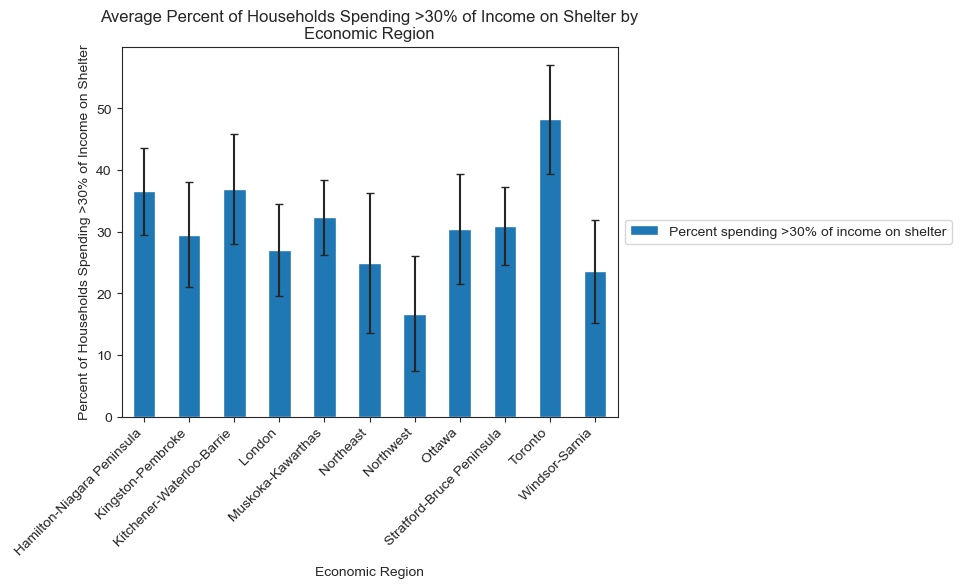

The ANOVA results for average percent of households spending >30% of their income on shelter by economic region in Ontario are F_onewayResult(statistic=24.185210971679208, pvalue=2.67723862421201e-35)


In [13]:
# Plots the percent spending >30% of income on shelter per economic region
ER_summary_mean['Percent spending >30% of income on shelter'].plot(kind='bar', stacked=True, yerr=ER_summary_stdev['Percent spending >30% of income on shelter'], capsize=3)

# Formats the chart
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Economic Region")
plt.ylabel('\n'.join(wrap("Percent of Households Spending >30% of Income on Shelter")))
plt.title('\n'.join(wrap("Average Percent of Households Spending >30% of Income on Shelter by Economic Region")))

# Save the figure
plt.savefig("Outputs/amt_on_shelter.png")

# Shows the plot
plt.show()

## Performs ANOVA statistical test to determine statistical significance of differences in averages of commute time bands
## Makes groups for ANOVA analysis
# Sets up an empty dict to hold groups
more_than_30 = {}

# Iterates through Economic regions
for region in ER_summary_mean.index:
    more_than_30[region] = summary_census[(summary_census['Economic region name'] == region) & (summary_census['Percent spending >30% of income on shelter']>0)]['Percent spending >30% of income on shelter']

## Performs ANOVA analysis to determine the significance of any differences in the means of the graphed percentages in the different economic regions
more_than_30_sig = stats.f_oneway(*(more_than_30[region] for region in ER_summary_mean.index))

# Prints the analysis
print(f"The ANOVA results for average percent of households spending >30% of their income on shelter by economic region in Ontario are {more_than_30_sig}")

**Description of the above graph**
* This graph is a visualization of the average percent of households spending >30% of their income on shelter for each economic region in Ontario
* The dataset is available as total number of households earning income, and number of people spending <30%, >=30%, or 30% to <100% of their income on shelter for each economic subdivision
    * Percentage of individuals spending >30% was calculated by adding the two >30% bins together and dividing the data by the total households for each subdivision
    * The average percentage was then calculated for all of the subdivisions within each economic region
* The error bars represent the standard deviation of the averages
* The ANOVA results show the significance of differences in the visualized average percentages per economic region

## Discussion of Relative Housing Cost Analysis

### Limitations and Assumptions
* Stats Canada has only number of households in its pre-determined bins for amount spent on shelter, at the census subdivision level
    * Bins are <30%, >=30%, and >30% to <100% of income as well as total earning income
    * **Assumption: All 3 bins are independant data**
    * To obtain percent spending >=30% on shelter per subdivision I added both >30% bins, divided by the total, andd multiplied by 100
    * Grouped by economic region and took the average to determine the average percent of households spending >30% of their income on shelter per economic region
    * **Summary statistics are based on these average percentages**
* This dataset is from 2021
    * During COVID, many tech/ IT jobs moved to primarily work from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This dataset documents percent of income spent on shelter by the economic region where they live
        * This does not have information on what companies they work for, where those companies are based, or how much they pay
        * **Therefore differences between economic regions may include, for example, people earning Toronto wages in a lower cost of living city and thus this dataset is not the ideal proxy for cost of living - but is what was accessible**

### Proxies
* Percentage of households paying >30% of their income on shelter is a proxy for the cost of living
    * Higher cost of shelter likely correlates with higher cost of living, but even if it does not (we don't have data to support this), higher cost of shelter/ more spent on shelter means less income left to spend on other necessities such as food

### Analysis
* The differences in average percentage of households spending >30% of their income on shelter per economic region are significant
    * The p-value is 2.7e-35, which is well under any reasonable cutoff to reject the null hypothesis that there is no significant difference in these values
* The economic divisions with the highest cost of living are:
    * Toronto, with on average 48% of households spending >30% of their income on housing
    * Kitchener-Waterloo-Barrie, with on average 37% of households spending >30% of their income on housing
    * Hamilton-Niagara Peninsula, with on average 36% of households spending >30% of their income on housing
* The economic divisions with the lowest cost of living are: 
    * Northwest, with on average 17% of households spending >30% of their income on housing
    * Windsor-Sarnia, with on average 24% of households spending >30% of their income on housing
    * Northeast, with on average 25% of households spending >30% of their income on housing
* **Overall there are significant differences in cost of living as proxied by average percent of households spending >30% of their income on shelter by econoimc region. The best economic region to live in based only on cost of living is Northwest, while the worst is Toronto. This should be taken into account when choosing where to live, but is likely a secondary consideration to the number of available jobs in a location**

# 5. Data Extensibility

## Overall Extensibility
* This analysis is specifically for NOC 22, which is technical occupations relating to natural and applied sciences
* However, the datasets here have information on all NOC major groups
* **This means that these analyses and charts can easily be generated for any other NOC major group of interest, and a comparison of different NOCs would be interesting in future though out of scope for this project**

## Employment Numbers
* This dataset has numbers for every year from 2006 - 2022
* **The analysis of employment numbers for specific NOC groups could therefore be calculated over time, to determine the trajectory of job opportunities, though this is currently out of scope for this project**
